
# Diabetes Prediction Using Machine Learning
InternPe Internship Project 
By: Sangeeth Mohanan PP

This project demonstrates how to build a machine learning model to predict whether a person has diabetes based on medical data.  
We will also visualize the dataset and compare multiple ML models.  


In [1]:

#  Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')


In [2]:

#  Load the dataset
data = pd.read_csv('C:/Users/sange/OneDrive/Desktop/intren ship/diabetes-prediction/diabetes.csv')
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:

#  Dataset Overview
print("Shape of dataset:", data.shape)
print("\nInfo:")
print(data.info())
print("\nMissing values:")
print(data.isnull().sum())


Shape of dataset: (768, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
Diab

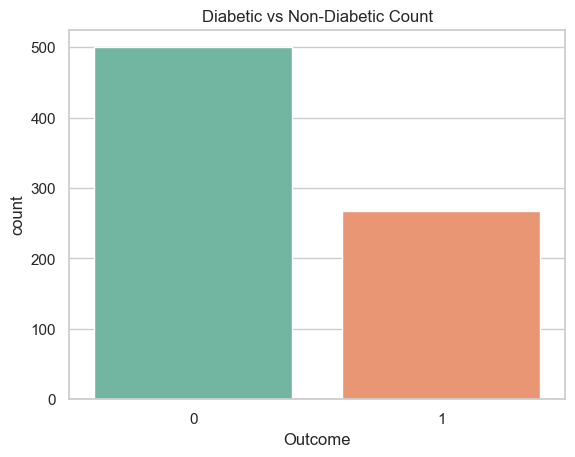

In [4]:

#  Count of diabetic (1) vs non-diabetic (0)
sns.countplot(x='Outcome', data=data, palette='Set2')
plt.title('Diabetic vs Non-Diabetic Count')
plt.show()


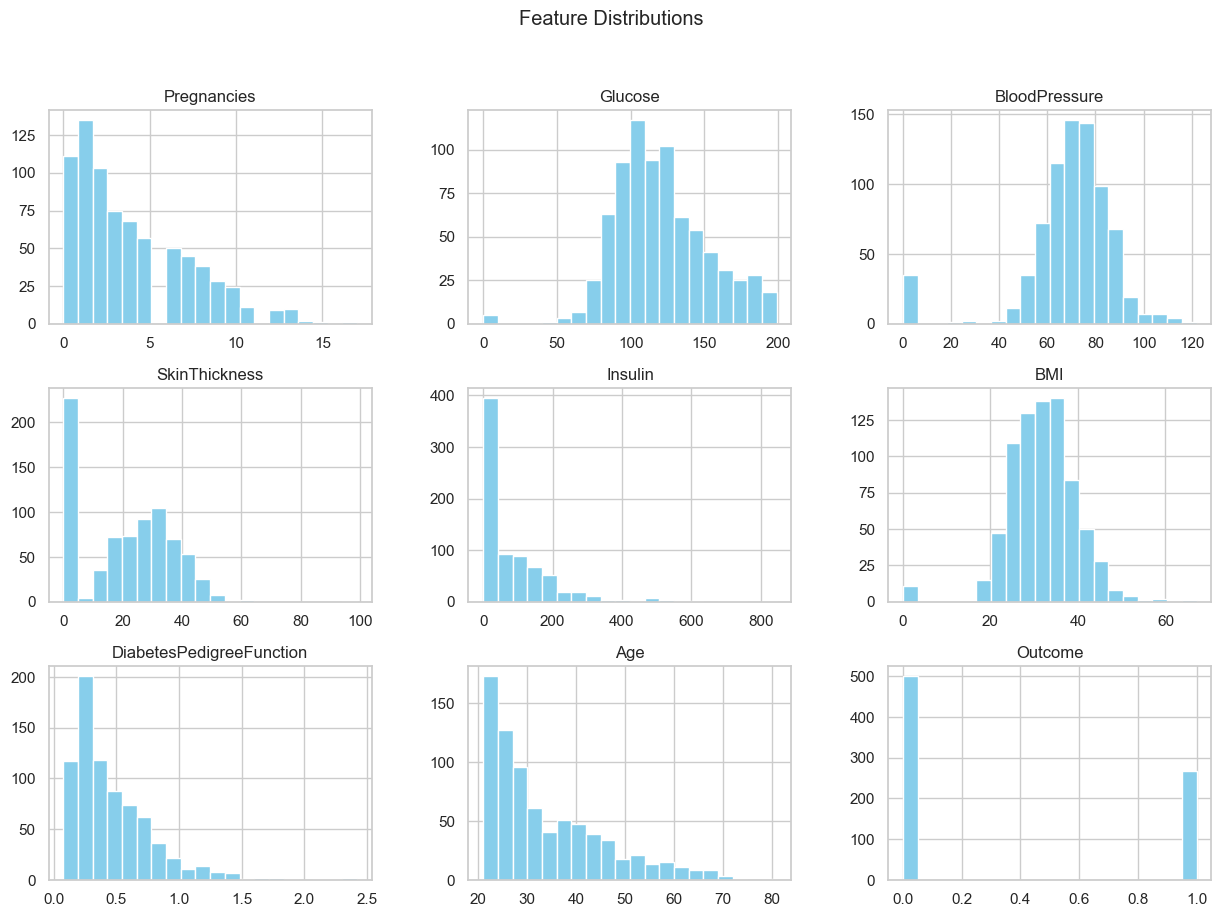

In [5]:

#  Histograms of all features
data.hist(bins=20, figsize=(15,10), color='skyblue')
plt.suptitle('Feature Distributions')
plt.show()


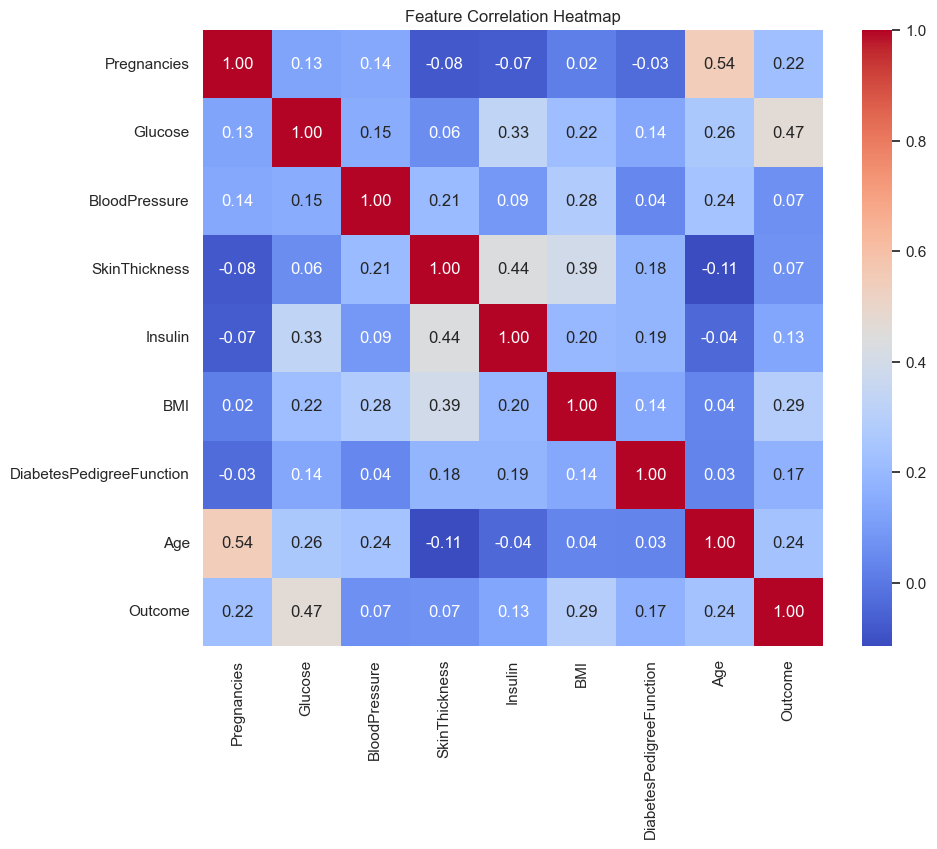

In [6]:

#  Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


In [7]:

#  Splitting data into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

#  Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [8]:

#  Training multiple ML models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": svm.SVC(probability=True, kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.7143
Support Vector Machine Accuracy: 0.7208
Random Forest Accuracy: 0.7597


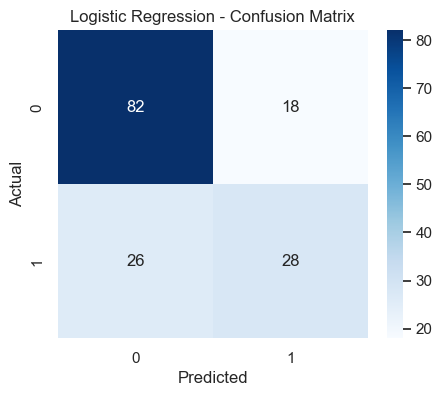

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



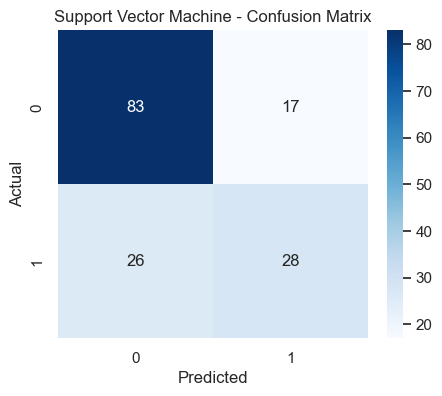

Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79       100
           1       0.62      0.52      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



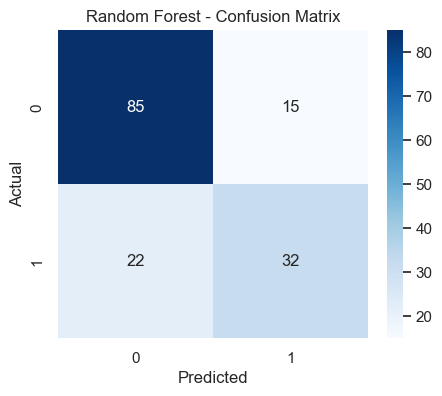

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



In [9]:

#  Confusion Matrices
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))


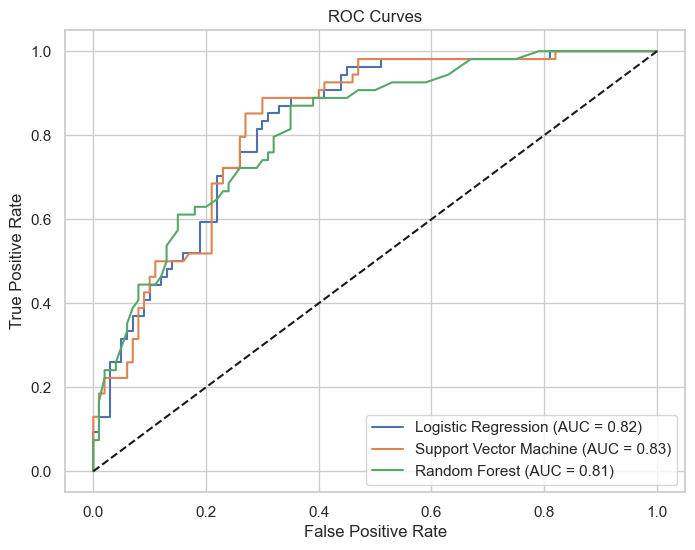

In [10]:

#  ROC Curves for all models
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [11]:

#  Predicting for a new patient
input_data = (5,166,72,19,175,25.8,0.587,51)  # Example input

# Scale input
input_scaled = scaler.transform(np.array(input_data).reshape(1, -1))

# Predict with Random Forest (best performing model)
prediction = models['Random Forest'].predict(input_scaled)

if prediction[0] == 1:
    print(" The person is Diabetic")
else:
    print(" The person is Not Diabetic")


 The person is Diabetic



##  Summary
We built and compared three machine learning models for diabetes prediction:  
- Logistic Regression
- Support Vector Machine
- Random Forest

The Random Forest model performed best. We also visualized key features, correlations, and evaluated model performance using confusion matrices and ROC curves.

